In [3]:
## Cargar datos con colab
## =============================================================================

from google.colab import drive
import os

drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
os.chdir("/gdrive/MyDrive/Seminario_Ciencia_Datos_Jaramillo_Higuita")
!ls

data


# Dataset

El dataset puede ser descargado desde este link, dentro de este notebook se usa la version CSV del mismo

https://www.datos.gov.co/Educaci-n/Saber-11-2019-2/ynam-yc42/about_data

NOTA: el archivo cambia de nombre con respecto a la fecha de descarga por lo cual sera necesario cambiar el nombre del archivo a la hora de cargar el data frame, el archivo se carga en una carpeta llamada "data" relativo a la ubicacion de este notebook

Resultados anonimizados de las pruebas de Saber 11 del segundo semestre del año 2019-2

# Instalaciones

In [5]:
%pip install prince
%pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 whi

# Objetivo

Predecir los resultados de las pruebas a partir de los datos del estudiente y su familia, utilizando modelos de regresión

# Importación de librerias

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import prince
from scipy import stats
from feature_engine.imputation import CategoricalImputer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from feature_engine.creation import CyclicalFeatures
from sklearn.feature_selection import SelectKBest, chi2

#Creación de modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE





In [7]:
pd.set_option('display.max_columns', None)

# Carga del dataset

In [8]:
df = pd.read_csv("data/Saber_11__2019-2_20240510.csv", low_memory=False)
df.head(5)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,MAGDALENA,47,SANTA ANA,47707,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",39008,147707000156,INSTITUCION EDUCATIVA DEPARTAMENTAL ANTONIO BR...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,147707000156,COL DPTAL ANTONIO BRUGES CARMONA,S,URBANO,MAÑANA,47707,SANTA ANA,47,MAGDALENA,N,47707,SANTA ANA,MAGDALENA,47,47,33,2,48,42,2,37,15,1,30,8,1,54.0,67,A1,208,25,50.9421557404314,2,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,BOGOTÁ,11,BOGOTÁ D.C.,11001,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",128611,311001105383,GIMN SAN ANGELO,MIXTO,NO OFICIAL,A,-,ACADÉMICO,311001105383,GIMN SAN ANGELO,S,URBANO,COMPLETA,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,60,76,3,65,88,3,54,71,2,59,83,3,63.0,88,A2,299,83,59.767864431576,3,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,BOLIVAR,13,CARTAGENA DE INDIAS,13001,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",35493,113001001719,INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,113001001719,INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,S,URBANO,MAÑANA,13001,CARTAGENA DE INDIAS,13,BOLIVAR,N,13001,CARTAGENA DE INDIAS,BOLIVAR,13,66,91,4,57,70,3,41,29,2,74,99,4,64.0,89,A2,299

# Variables Globales

Empezamos con la definicion de una lista de columnas que luego usaremos para eliminar las columnas Inecesarias y ademas definimos una lista de columnas que por las cuales deberemos filtrar para evitar posibles valores atipicos

In [9]:
# lista de columnas que se eliminaran
drop_cols =[
]

# Arreglo con los filtros que se deben aplicar para eliminar datos atipicos
filters = {}


# Tamaño del dataset

In [10]:
df.shape

(546212, 82)

## Análisis de Duplicados

In [11]:
df[df.duplicated(keep=False)]

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E


No hay filas duplicadas en el dataset

## Análisis de Nulos

In [12]:
df.isna().any(axis=1).sum()

56651

# Análisis de Columnas

Este data set esta comprendido por 82 columnas las cuales estan segmentadas en la informacion del estudiante de su familia y de su colegio ademas de las columnas de los resultados de las pruebas.

Iniciaremos por hacer una analis de las columnas por sus agrupaciones y eliminaremos las columnas que no sean utiles para el desarrollo del modelo predictivo, acontinuacion definiremos algunos de los criterios por los cuales se eliminaran las columnas

* C01: Columnas Repetidas dado que se presenta su version Texto y su Version Codigo, nos quedaremos con su version Texto para la aplicacion de one hot encoding
* C02: Columnas Que contengan informacion muy especifica y nos ayuden a identificar Estudiantes atipicos que puedan dañar la generalizacion de nuestro modelo
* C03: Columnas que tenga un valor constante en todas las filas
* C04: Columnas que tengan valores unicos en todas sus filas
* C05: Columnas con llaves únicas asignadas por el Dane o Icfes, que no representan información del estudiante, familia o colegio.

* F01: Ademas se filtraran algunas filas del dataset con el objetivo de eliminar estudiantes con caracteristicas atipicas


## Columnas de texto

In [13]:

text_cols = df.select_dtypes(include = ["object", 'category']).columns.tolist() # listamos todas las columnas de texto
estu_text_cols = list(filter(lambda x: 'ESTU' in x, text_cols )) # Columnas con información del estudiante
fami_text_Cols = list(filter(lambda x: 'FAMI' in x, text_cols )) # Columnas con información de la familia del estudiante
cole_text_Cols = list(filter(lambda x: 'COLE' in x, text_cols )) # Columnas con información del colegio del estudiante
restante_texto_cols = list(filter(lambda x: not 'ESTU' in x and not 'FAMI' in x and not 'COLE' in x, text_cols)) # colummnas restantes

### Analizar columnas de texto de Estu

In [14]:
df[estu_text_cols].head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,MAGDALENA,47,SANTA ANA,47707,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",N,SANTA ANA,MAGDALENA,50.9421557404314,2,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,BOGOTÁ,11,BOGOTÁ D.C.,11001,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",N,BOGOTÁ D.C.,BOGOTÁ,59.767864431576,3,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,BOLIVAR,13,CARTAGENA DE INDIAS,13001,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",N,CARTAGENA DE INDIAS,BOLIVAR,50.7642383644749,2,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,BOGOTÁ,11,BOGOTÁ D.C.,11001,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",N,BOGOTÁ D.C.,BOGOTÁ,45.7791353123516,2,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,BOGOTÁ,11,BOGOTÁ D.C.,11001,No leo por entretenimiento,Más de 3 horas,Más de 30 horas,No,N,BOGOTÁ D.C.,BOGOTÁ,52.9109464277177,3,PUBLICAR,NO


In [15]:
df[estu_text_cols].describe(include='all')

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
count,546212,546212,546212,546212,546212,546212,546212,546212,546212,545835,546212,545835,546212,545585,515914,545831,530704,546212,546212,546212,546208,529171,546212,546212
unique,10,33,3,11663,546212,1,3,33,21,34,35,1031,1115,6,6,6,5,2,472,33,469865,5,3,4
top,TI,COLOMBIA,F,01/01/1900 12:00:00 AM,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,BOGOTÁ,11,BOGOTÁ D.C.,11001,30 minutos o menos,Entre 1 y 3 horas,0,No,N,BOGOTÁ D.C.,BOGOTÁ,-,2,PUBLICAR,GENERACION E - GRATUIDAD
freq,445780,544918,295994,1826,1,546212,506074,544918,506203,83600,83600,83600,83600,199094,157557,354503,377436,546086,84122,84122,17041,197566,545755,297357


In [16]:
drop_cols += [
    "ESTU_TIPODOCUMENTO", #C04
    "ESTU_NACIONALIDAD", # F01
    "ESTU_CONSECUTIVO", #C05
    "ESTU_ESTUDIANTE", #C03
    "ESTU_TIENEETNIA", #F01,C03
    "ESTU_ETNIA", #F01,C03
    "ESTU_COD_RESIDE_DEPTO", #C01
    "ESTU_COD_RESIDE_MCPIO", #C01
    "ESTU_PRIVADO_LIBERTAD", #F01,C03
    "ESTU_NSE_INDIVIDUAL", #C04
    "ESTU_ESTADOINVESTIGACION", #F01,C03
    "ESTU_GENERACION-E", #No relevante para el objetivo
    "ESTU_PAIS_RESIDE", #C04
    "ESTU_DEPTO_PRESENTACION", #C01
    "ESTU_MCPIO_PRESENTACION", #C01
    "ESTU_INSE_INDIVIDUAL", #No sabemos lo que representa esta variable
    "ESTU_MCPIO_RESIDE" #son mas de 900 municipios despues de un one hot encodig el dataset quedaria muy ancho
]

filters.update(
    {
        "ESTU_NACIONALIDAD": "COLOMBIA", # No tomamos las pruebas realizadas por extrangeros
        "ESTU_TIENEETNIA": "No",   # No tomamos a los estudiantes que especificaron su etnia dado que son muy pocos y quedaria desbalanceado
        "ESTU_PRIVADO_LIBERTAD": "N", # Los estudiantes privados de la libertad eran muy pocos y podrian representar valores atipicos
        "ESTU_ESTADOINVESTIGACION":"PUBLICAR"
    }
)

### Analizar columnas de texto de Fami

In [17]:
df[fami_text_Cols].head()

,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA
0,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor
1,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor
2,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual
3,Estrato 3,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,No aplica,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,No,No,No,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual
4,Estrato 3,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Nunca o rara vez comemos eso,Todos o casi todos los días,Mejor


In [18]:
df[fami_text_Cols].describe()

,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA
count,546186,537749,539794,537920,525253,538081,538743,537875,523932,538027,538569,537582,538006,537395,538487,537558,523907,536587,523880,537953
unique,8,6,7,13,13,14,14,3,3,3,3,3,3,3,3,5,5,5,5,4
top,Estrato 2,3 a 4,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual
freq,188314,257604,207232,117488,136286,78187,213377,314042,391419,295409,405542,280967,401388,308054,410475,207526,170538,209228,198491,322524


### Analizar columnas de texto de Cole

In [19]:
df[cole_text_Cols].head()

,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_DEPTO_UBICACION
0,INSTITUCION EDUCATIVA DEPARTAMENTAL ANTONIO BR...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,COL DPTAL ANTONIO BRUGES CARMONA,S,URBANO,MAÑANA,SANTA ANA,MAGDALENA
1,GIMN SAN ANGELO,MIXTO,NO OFICIAL,A,-,ACADÉMICO,GIMN SAN ANGELO,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ
2,INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,S,URBANO,MAÑANA,CARTAGENA DE INDIAS,BOLIVAR
3,COLEGIO VIRGINIA GUTIERREZ DE PINEDA (IED),MIXTO,OFICIAL,A,-,ACADÉMICO,COL VIRGINIA GUTIERREZ DE PINEDA (INS EDUC DIST),S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ
4,COLEGIO PALERMO IEDIP (IED),MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,CENT EDUC DIST PALERMO CEDIP,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ


In [20]:
df[cole_text_Cols].describe()

,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_DEPTO_UBICACION
count,546212,546212,546212,546212,546212,532464,546212,546212,546212,546212,546212,546212
unique,9372,3,2,3,3,5,10284,2,2,6,1030,33
top,INSTITUCION EDUCATIVA FRANCISCO JOSE DE CALDAS,MIXTO,OFICIAL,A,N,ACADÉMICO,INSTITUTO TECNICO INDUSTRIAL,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ
freq,1147,528780,416011,541901,453280,284200,881,523322,460467,257060,82832,82832


In [21]:

drop_cols+=[
    "COLE_MCPIO_UBICACION", # Se sale del alcance del proyecto, se busca predecir puntajes de estudiantes a nivel departamental
]

filters.update(
    {
        "COLE_GENERO": "MIXTO",  # No tomamos los colegios de solo hombre y mujeres porque son muy pocos y quedaria desbalanceado
        "COLE_CALENDARIO": "A",   # No tomamos otros calendarios porque son muy pocos y quedaria desbalanceado
        "COLE_AREA_UBICACION": "URBANO", # Se deja URBANO ya que son la mayoría
        "COLE_NATURALEZA": "OFICIAL" # No tomamos otras naturalezas de colgio ya que son muy pocos y quedaria desbalanceado
    }
)

### Analizar columnas de texto de Restantes

In [22]:
df[restante_texto_cols].head()

,DESEMP_INGLES,PERCENTIL_GLOBAL
0,A1,25
1,A2,83
2,A2,84
3,A1,88
4,A1,78


In [23]:
df[restante_texto_cols].describe()

,DESEMP_INGLES,PERCENTIL_GLOBAL
count,546212,546212
unique,5,101
top,A-,22
freq,271183,6443


In [24]:
drop_cols+=[
    "DESEMP_INGLES", # Son valores que se dan dependiendo de los resultados de las pruebas en ingles
    "PERCENTIL_GLOBAL" # Depende de los resultados obtenidos en las pruebas
]

## Columnas Numericas

In [25]:
# listamos todas las columnas de numeros
num_cols=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
estu_num_cols = list(filter(lambda x: 'ESTU' in x, num_cols))
fami_num_Cols = list(filter(lambda x: 'FAMI' in x, num_cols))
cole_num_Cols = list(filter(lambda x: 'COLE' in x, num_cols)) # Columnas con información del colegio del estudiante
restante_num_cols = list(filter(lambda x: not 'ESTU' in x and not 'FAMI' in x and not 'COLE' in x, num_cols))

### Analizar columnas de numericas de Estu

In [26]:
estu_num_cols

['ESTU_COD_MCPIO_PRESENTACION',
 'ESTU_COD_DEPTO_PRESENTACION',
 'ESTU_NSE_ESTABLECIMIENTO']

In [27]:
df[estu_num_cols].head()

,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,ESTU_NSE_ESTABLECIMIENTO
0,47707,47,2.0
1,11001,11,4.0
2,13001,13,3.0
3,11001,11,3.0
4,11001,11,3.0


In [28]:
drop_cols += [
        "ESTU_COD_MCPIO_PRESENTACION", # C01
        "ESTU_COD_DEPTO_PRESENTACION", # C01

]

### Analizar columnas de numericas de Fami

In [29]:
fami_num_Cols

[]

No hay columnas de FAMI númericas

### Analizar columnas de numericas de Cole

In [30]:
cole_num_Cols

['COLE_CODIGO_ICFES',
 'COLE_COD_DANE_ESTABLECIMIENTO',
 'COLE_COD_DANE_SEDE',
 'COLE_COD_MCPIO_UBICACION',
 'COLE_COD_DEPTO_UBICACION']

In [31]:
df[cole_num_Cols].head()

,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION
0,39008,147707000156,147707000156,47707,47
1,128611,311001105383,311001105383,11001,11
2,35493,113001001719,113001001719,13001,13
3,138032,111001107069,111001107069,11001,11
4,217406,111001094897,111001094897,11001,11


In [32]:
df[cole_num_Cols].astype(str).describe()

,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION
count,546212,546212,546212,546212,546212
unique,13297,10157,10939,1113,33
top,724211,105001000108,105001000108,11001,11
freq,869,869,869,82832,82832


Las columnas tienen tipo númerico, pero son códigos

In [33]:
drop_cols += [
    "COLE_CODIGO_ICFES", # C05
    "COLE_COD_DANE_ESTABLECIMIENTO", # C05
    "COLE_COD_DANE_SEDE", # C05
    "COLE_COD_MCPIO_UBICACION", # C01
    "COLE_COD_DEPTO_UBICACION" # C01
]

### Analizar columnas de numericas Restantes

In [34]:
df[restante_num_cols].head()

,PERIODO,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL
0,20194,47,33,2,48,42,2,37,15,1,30,8,1,54.0,67,208
1,20194,60,76,3,65,88,3,54,71,2,59,83,3,63.0,88,299
2,20194,66,91,4,57,70,3,41,29,2,74,99,4,64.0,89,299
3,20194,62,81,3,54,60,3,61,87,3,73,99,4,53.0,67,309
4,20194,63,85,3,57,70,3,55,74,2,57,79,3,52.0,63,288


In [35]:
df[restante_num_cols].describe()

,PERIODO,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL
count,546212.0,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546193.000000,546212.000000,546212.000000
mean,20194.0,52.157305,50.111151,2.612927,50.606349,50.110596,2.440651,48.234779,50.157646,2.020730,46.224589,50.179648,1.901584,48.416891,50.098669,246.186464
std,0.0,10.537963,28.959257,0.756910,11.997649,28.947324,0.752315,10.764035,28.935705,0.761262,12.140588,28.911682,0.820178,12.558438,28.917401,51.386858
min,20194.0,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,20194.0,45.000000,25.000000,2.000000,42.000000,25.000000,2.000000,40.000000,25.000000,1.000000,37.000000,25.000000,1.000000,39.000000,25.000000,207.000000
50%,20194.0,52.000000,50.000000,3.000000,51.000000,50.000000,3.000000,48.000000,50.000000,2.000000,45.000000,50.000000,2.000000,48.000000,50.000000,243.000000
75%,20194.0,60.000000,75.000000,3.000000,59.000000,75.000000,3.000000,56.000000,75.000000,3.000000,55.000000,75.000000,2.000000,56.000000,75.000000,282.000000
max,20194.0,100.000000,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,100.000000,477.000000


In [36]:
drop_cols+=[
    "PERIODO" # Columna con un solo valor que pone el ICFES, no esta relacionada con información del estudiante
]

# Filtrado de Nulos

In [37]:
df_filtrado = df.dropna()

In [38]:
df_filtrado = df_filtrado.reindex(sorted(df_filtrado.columns), axis=1)

# Imputación de Columnas

Hay texto con el caracter "-", esto significa que el campo no fue llenado. Descartar filas con "-" hace que el dataset se redusca en un 80%
Por lo que se imputaran utilizando el método de la categoría más frecuente

In [39]:
cols_with_character = list(df_filtrado.columns[df_filtrado.isin(['-']).any()])  # Se obtiene las columnas donde hay valores con -

In [40]:
df_filtrado[cols_with_character] = df_filtrado[cols_with_character].replace('-', np.nan) # Se Reemplazan los "-" por NaN

In [41]:
imputer = CategoricalImputer(imputation_method='frequent')
df_filtrado[cols_with_character] = imputer.fit_transform(df_filtrado[cols_with_character]) # se implmenta el imputador sobre las columnas con NAN

In [42]:
df_filtrado[cols_with_character]

,COLE_BILINGUE,COLE_CARACTER,ESTU_DEDICACIONINTERNET,ESTU_DEDICACIONLECTURADIARIA,ESTU_ETNIA,ESTU_GENERO,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_COMELECHEDERIVADOS,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_NUMLIBROS,FAMI_PERSONASHOGAR,FAMI_SITUACIONECONOMICA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEMOTOCICLETA,FAMI_TIENESERVICIOTV,FAMI_TRABAJOLABORMADRE,FAMI_TRABAJOLABORPADRE
0,N,TÉCNICO/ACADÉMICO,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Comunidad afrodescendiente,M,Menos de 10 horas,"Si, en efectivo",3 a 5 veces por semana,Nunca o rara vez comemos eso,1 o 2 veces por semana,Cinco,Secundaria (Bachillerato) completa,Educación profesional completa,Estrato 3,MÁS DE 100 LIBROS,5 a 6,Peor,No,No,No,Si,Si,Si,No,Si,"Trabaja en el hogar, no trabaja o estudia",No aplica
1,N,ACADÉMICO,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Comunidad afrodescendiente,M,Menos de 10 horas,"Si, en efectivo",3 a 5 veces por semana,1 o 2 veces por semana,Todos o casi todos los días,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Estrato 3,MÁS DE 100 LIBROS,9 o más,Mejor,Si,Si,No,Si,Si,Si,No,Si,Es dueño de un negocio pequeño (tiene pocos em...,Trabaja por cuenta propia (por ejemplo plomero...
2,N,TÉCNICO/ACADÉMICO,Más de 3 horas,Entre 30 y 60 minutos,Comunidad afrodescendiente,M,0,"Si, en efectivo",Todos o casi todos los días,3 a 5 veces por semana,Todos o casi todos los días,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 1,26 A 100 LIBROS,5 a 6,Igual,No,No,No,No,No,Si,No,Si,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público
3,N,ACADÉMICO,Entre 30 y 60 minutos,30 minutos o menos,Ninguno,M,Más de 30 horas,"Si, en efectivo",Todos o casi todos los días,3 a 5 veces por semana,Todos o casi todos los días,Dos,Secundaria (Bachillerato) completa,Primaria incompleta,Estrato 3,11 A 25 LIBROS,3 a 4,Igual,No,Si,No,No,No,No,No,No,Es dueño de un negocio pequeño (tiene pocos em...,No aplica
4,N,TÉCNICO/ACADÉMICO,Más de 3 horas,No leo por entretenimiento,Comunidad afrodescendiente,M,Más de 30 horas,No,Nunca o rara vez comemos eso,Todos o casi todos los días,Todos o casi todos los días,Cuatro,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,Estrato 3,26 A 100 LIBROS,3 a 4,Mejor,No,Si,No,Si,Si,Si,No,Si,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546207,N,TÉCNICO/ACADÉMICO,Más de 3 horas,No leo por entretenimiento,Comunidad afrodescendiente,M,Menos de 10 horas,"Si, en efectivo y especie",Todos o casi todos los días,1 o 2 veces por semana,1 o 2 veces por semana,Dos,Secundaria (Bachillerato) completa,Primaria incompleta,Estrato 2,0 A 10 LIBROS,5 a 6,Igual,No,Si,No,No,Si,No,Si,Si,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...
546208,N,ACADÉMICO,Más de 3 horas,No leo por entretenimiento,Comunidad afrodescendiente,M,0,No,3 a 5 veces por semana,3 a 5 veces por semana,Todos o casi todos los días,Tres,Primaria completa,No sabe,Estrato 3,11 A 25 LIBROS,5 a 6,Mejor,No,Si,Si,Si,Si,Si,Si,Si,Es vendedor o trabaja en atención al público,No sabe
546209,N,TÉCNICO,Entre 30 y 60 minutos,30 minutos o menos,Comunidad afrodescendiente,M,0,No,Todos o casi todos los días,3 a 5 veces por semana,Todos o casi todos los días,Tres,Técnica o tecnológica completa,Postgrado,Estrato 2,26 A 100 LIBROS,5 a 6,Igual,Si,Si,Si,Si,Si,Si,Si,Si,Es vendedor o trabaja en atención al público,"Trabaja como profesional (por ejemplo médico, ..."
546210,N,TÉCNICO/ACADÉMICO,Entre 30 y 60 minutos,30 minutos o menos,Comunidad afrodescendiente,M,Más de 30 horas,"Si, en efectivo",Todos o casi 

# Filtrado de Valores

In [43]:
def filtrar(df, filtros):
    """
    Función para filtrar filas de un dataframe de pandas
    """
    filtered_df = df
    for key in filtros:
        filtered_df = filtered_df[filtered_df[key] == filtros[key]]

    return filtered_df

In [44]:
df_filtrado = filtrar(df_filtrado, filters)

In [45]:
len(df_filtrado.columns)

82

# Encoding

## Label Ordinary Encoding

Dado que varias de las columnas categoricas representan valores ordenados, el uso de One hot encoding nos representa una perdida de contexto importante

Ejemplo: la columna que nos indica el estrato de la casa donde reside el estudiante, [1,2,3,4,5,6] es ordinal y nos puede dar informacion acerca de la situacion economica de la familia por lo cual hacer un encoding numerico ordenado, se ve como la mejor estrategia.

Esta funcion recibe el dataframe, la lista ordenada de categorias y el nombre de la columna a la cual se le aplicara el encoding

In [46]:
def orderEncode(df,categ,col):
    df2 = df
    for i in categ:
        df2[col] = df2[col].replace(categ,range(len(categ)))
    return df2[col]

In [47]:
df_encoded = df_filtrado

#------------ESTU_DEDICACIONINTERNET-----------------

categorias = [
    "No Navega Internet",
    "30 minutos o menos",
    "Entre 30 y 60 minutos",
    "Entre 1 y 3 horas",
    "Más de 3 horas"
]

df_encoded["ESTU_DEDICACIONINTERNET"] = orderEncode(df_encoded,categorias,"ESTU_DEDICACIONINTERNET")

#-------------ESTU_DEDICACIONLECTURADIARIA--------------


categorias = [
    "No leo por entretenimiento",
    "30 minutos o menos",
    "Entre 30 y 60 minutos",
    "Entre 1 y 2 horas",
    "Más de 2 horas"
]

df_encoded["ESTU_DEDICACIONLECTURADIARIA"] = orderEncode(df_encoded,categorias,"ESTU_DEDICACIONLECTURADIARIA")

#----------------ESTU_HORASSEMANATRABAJA--------------------

categorias = [
    '0',
    'Menos de 10 horas',
    'Entre 11 y 20 horas',
    'Entre 21 y 30 horas',
    'Más de 30 horas'
]

df_encoded["ESTU_HORASSEMANATRABAJA"] = orderEncode(df_encoded,categorias,"ESTU_HORASSEMANATRABAJA")

#----------------FAMI_COMECARNEPESCADOHUEVO  &  FAMI_COMECEREALFRUTOSLEGUMBRE & FAMI_COMELECHEDERIVADOS--------------------

categorias = [
    'Nunca o rara vez comemos eso',
    '1 o 2 veces por semana',
    '3 a 5 veces por semana',
    'Todos o casi todos los días'
]

df_encoded["FAMI_COMECARNEPESCADOHUEVO"] = orderEncode(df_encoded,categorias,"FAMI_COMECARNEPESCADOHUEVO")
df_encoded["FAMI_COMECEREALFRUTOSLEGUMBRE"] = orderEncode(df_encoded,categorias,"FAMI_COMECEREALFRUTOSLEGUMBRE")
df_encoded["FAMI_COMELECHEDERIVADOS"] = orderEncode(df_encoded,categorias,"FAMI_COMELECHEDERIVADOS")

#-----------------------FAMI_EDUCACIONMADRE & FAMI_EDUCACIONPADRE--------------------------------

categorias = [
    'No Aplica',
    'Ninguno',
    'No sabe',
    'Primaria incompleta',
    'Primaria completa',
    'Secundaria (Bachillerato) incompleta',
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa',
    'Educación profesional incompleta',
    'Educación profesional completa',
    'Postgrado'
]

df_encoded["FAMI_EDUCACIONMADRE"] = orderEncode(df_encoded,categorias,"FAMI_EDUCACIONMADRE")
df_encoded["FAMI_EDUCACIONPADRE"] = orderEncode(df_encoded,categorias,"FAMI_EDUCACIONPADRE")

#-------------------------------FAMI_ESTRATOVIVIENDA--------------------------

categorias = [
    'Sin Estrato',
    'Estrato 1',
    'Estrato 2',
    'Estrato 3',
    'Estrato 4',
    'Estrato 5',
    'Estrato 6'
]

df_encoded["FAMI_ESTRATOVIVIENDA"] = orderEncode(df_encoded,categorias,"FAMI_ESTRATOVIVIENDA")


#----------------------------------FAMI_NUMLIBROS--------------------------------

categorias = [
    '0 A 10 LIBROS',
    '11 A 25 LIBROS',
    '26 A 100 LIBROS',
    'MÁS DE 100 LIBROS'
]

df_encoded["FAMI_NUMLIBROS"] = orderEncode(df_encoded,categorias,"FAMI_NUMLIBROS")

#----------------------------------FAMI_PERSONASHOGAR--------------------------------

categorias = [
    '1 a 2',
    '3 a 4',
    '5 a 6',
    '7 a 8',
    '9 o más'
]

df_encoded["FAMI_PERSONASHOGAR"] = orderEncode(df_encoded,categorias,"FAMI_PERSONASHOGAR")

#----------------------------------FAMI_SITUACIONECONOMICA--------------------------------

categorias = [
    "Peor",
    "Igual",
    "Mejor"
]

df_encoded["FAMI_SITUACIONECONOMICA"] = orderEncode(df_encoded,categorias,"FAMI_SITUACIONECONOMICA")

#----------------------------------FAMI_TIENECOMPUTADOR & FAMI_TIENEINTERNET & FAMI_TIENESERVICIOTV & --------------------------------

categorias = [
    "No", # 0
    "Si", # 1
]

df_encoded["FAMI_TIENECOMPUTADOR"] = orderEncode(df_encoded,categorias,"FAMI_TIENECOMPUTADOR")
df_encoded["FAMI_TIENEINTERNET"] = orderEncode(df_encoded,categorias,"FAMI_TIENEINTERNET")
df_encoded["FAMI_TIENESERVICIOTV"] = orderEncode(df_encoded,categorias,"FAMI_TIENESERVICIOTV")

#----------------------------------ESTU_TIPOREMUNERACION--------------------------------
categorias = [
    "No",
    "Si, en especie",
    "Si, en efectivo y especie",
    "Si, en efectivo"
]

df_encoded["ESTU_TIPOREMUNERACION"] = orderEncode(df_encoded,categorias,"ESTU_TIPOREMUNERACION")

#------------------------------------------FAMI_TRABAJOLABORMADRE  &  FAMI_TRABAJOLABORPADRE-------------------------------

categorias = [
    'No sabe', # 0
    'No aplica', # 1
    'Trabaja en el hogar, no trabaja o estudia', # 2
    'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción', # 3
    'Es agricultor, pesquero o jornalero', # 4
    'Es operario de máquinas o conduce vehículos (taxita, chofer)', # 5
    'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc', # 6
    'Es vendedor o trabaja en atención al público', # 7
    'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)', # 8
    'Trabaja por cuenta propia (por ejemplo plomero, electricista)', # 9
    'Pensionado', # 10
    'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)', # 11
    'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial' # 12
]

df_encoded["FAMI_TRABAJOLABORMADRE"] = orderEncode(df_encoded,categorias,"FAMI_TRABAJOLABORMADRE")
df_encoded["FAMI_TRABAJOLABORPADRE"] = orderEncode(df_encoded,categorias,"FAMI_TRABAJOLABORPADRE")

#------------------------------------------ESTU_GENERO -------------------------------

categorias = [
    'M', # 0
    'F' # 1
]

df_encoded["ESTU_GENERO"] = orderEncode(df_encoded,categorias,"ESTU_GENERO")

#------------------------------------------COLE_BILINGUE-------------------------------

categorias = [
    'N',
    'S'
]

df_encoded["COLE_BILINGUE"] = orderEncode(df_encoded,categorias,"COLE_BILINGUE")

#------------------------------------------COLE_NATURALEZA-------------------------------

categorias = [
    'NO OFICIAL',
    'OFICIAL'
]

df_encoded["COLE_NATURALEZA"] = orderEncode(df_encoded,categorias,"COLE_NATURALEZA")

#------------------------------------------COLE_SEDE_PRINCIPAL-------------------------------

categorias = [
    'N',
    'S'
]

df_encoded["COLE_SEDE_PRINCIPAL"] = orderEncode(df_encoded,categorias,"COLE_SEDE_PRINCIPAL")

#------------------------------------------DESEMP_INGLES-------------------------------

categorias = [
    'A-',
    'A1',
    'A2',
    'B1',
    'B+'
]

df_encoded["DESEMP_INGLES"] = orderEncode(df_encoded,categorias,"DESEMP_INGLES")

#------------------------------------------ESTU_TIENEETNIA-------------------------------

categorias = [
    'No',
    'Si'
]

df_encoded["ESTU_TIENEETNIA"] = orderEncode(df_encoded,categorias,"ESTU_TIENEETNIA")


#------------------------------------------FAMI_CUARTOSHOGAR-------------------------------

categorias = [
    'Uno', # 0
    'Dos', # 1
    'Tres', # 2
    'Cuatro', # 3
    'Cinco', # 4
    'Seis o mas' # 5
]

df_encoded["FAMI_CUARTOSHOGAR"] = orderEncode(df_encoded,categorias,"FAMI_CUARTOSHOGAR")

#------------------------------------------FAMI_TIENEAUTOMOVIL-------------------------------
categorias = [
    'No',
    'Si'
]

df_encoded["FAMI_TIENEAUTOMOVIL"] = orderEncode(df_encoded,categorias,"FAMI_TIENEAUTOMOVIL")

#------------------------------------------FAMI_TIENECONSOLAVIDEOJUEGOS-------------------------------
categorias = [
    'No',
    'Si'
]

df_encoded["FAMI_TIENECONSOLAVIDEOJUEGOS"] = orderEncode(df_encoded,categorias,"FAMI_TIENECONSOLAVIDEOJUEGOS")

#------------------------------------------FAMI_TIENEHORNOMICROOGAS-------------------------------
categorias = [
    'No',
    'Si'
]

df_encoded["FAMI_TIENEHORNOMICROOGAS"] = orderEncode(df_encoded,categorias,"FAMI_TIENEHORNOMICROOGAS")

#------------------------------------------FAMI_TIENELAVADORA-------------------------------
categorias = [
    'No',
    'Si'
]

df_encoded["FAMI_TIENELAVADORA"] = orderEncode(df_encoded,categorias,"FAMI_TIENELAVADORA")

#------------------------------------------FAMI_TIENEMOTOCICLETA-------------------------------
categorias = [
    'No',
    'Si'
]

df_encoded["FAMI_TIENEMOTOCICLETA"] = orderEncode(df_encoded,categorias,"FAMI_TIENEMOTOCICLETA")

#------------------------------------------COLE_AREA_UBICACION-------------------------------
categorias = [
    'RURAL',
    'URBANO'
]

df_encoded["COLE_AREA_UBICACION"] = orderEncode(df_encoded,categorias,"COLE_AREA_UBICACION")

<ipython-input-46-5c7a20d3d279>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[col] = df2[col].replace(categ,range(len(categ)))


## One-Hot Encoding

In [48]:
df_encoded = pd.get_dummies(df_encoded, columns = [
    'ESTU_DEPTO_RESIDE', 'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_DEPTO_UBICACION',
    'COLE_GENERO', 'COLE_JORNADA', 'ESTU_ESTADOINVESTIGACION', 'ESTU_ETNIA', 'ESTU_NACIONALIDAD', 'ESTU_PAIS_RESIDE',
    'ESTU_PRIVADO_LIBERTAD', 'ESTU_TIPODOCUMENTO', 'ESTU_DEPTO_PRESENTACION', 'ESTU_GENERACION-E' ], dtype=int)

In [49]:
df_encoded

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,DESEMP_C_NATURALES,DESEMP_INGLES,DESEMP_LECTURA_CRITICA,DESEMP_MATEMATICAS,DESEMP_SOCIALES_CIUDADANAS,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_CONSECUTIVO,ESTU_DEDICACIONINTERNET,ESTU_DEDICACIONLECTURADIARIA,ESTU_ESTUDIANTE,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_HORASSEMANATRABAJA,ESTU_INSE_INDIVIDUAL,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_NSE_ESTABLECIMIENTO,ESTU_NSE_INDIVIDUAL,ESTU_TIENEETNIA,ESTU_TIPOREMUNERACION,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_COMELECHEDERIVADOS,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_NUMLIBROS,FAMI_PERSONASHOGAR,FAMI_SITUACIONECONOMICA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEMOTOCICLETA,FAMI_TIENESERVICIOTV,FAMI_TRABAJOLABORMADRE,FAMI_TRABAJOLABORPADRE,PERCENTIL_C_NATURALES,PERCENTIL_GLOBAL,PERCENTIL_INGLES,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,ESTU_DEPTO_RESIDE_AMAZONAS,ESTU_DEPTO_RESIDE_ANTIOQUIA,ESTU_DEPTO_RESIDE_ARAUCA,ESTU_DEPTO_RESIDE_ATLANTICO,ESTU_DEPTO_RESIDE_BOGOTÁ,ESTU_DEPTO_RESIDE_BOLIVAR,ESTU_DEPTO_RESIDE_BOYACA,ESTU_DEPTO_RESIDE_CALDAS,ESTU_DEPTO_RESIDE_CAQUETA,ESTU_DEPTO_RESIDE_CASANARE,ESTU_DEPTO_RESIDE_CAUCA,ESTU_DEPTO_RESIDE_CESAR,ESTU_DEPTO_RESIDE_CHOCO,ESTU_DEPTO_RESIDE_CORDOBA,ESTU_DEPTO_RESIDE_CUNDINAMARCA,ESTU_DEPTO_RESIDE_GUAINIA,ESTU_DEPTO_RESIDE_GUAVIARE,ESTU_DEPTO_RESIDE_HUILA,ESTU_DEPTO_RESIDE_LA GUAJIRA,ESTU_DEPTO_RESIDE_MAGDALENA,ESTU_DEPTO_RESIDE_META,ESTU_DEPTO_RESIDE_NARIÑO,ESTU_DEPTO_RESIDE_NORTE SANTANDER,ESTU_DEPTO_RESIDE_PUTUMAYO,ESTU_DEPTO_RESIDE_QUINDIO,ESTU_DEPTO_RESIDE_RISARALDA,ESTU_DEPTO_RESIDE_SAN ANDRES,ESTU_DEPTO_RESIDE_SANTANDER,ESTU_DEPTO_RESIDE_SUCRE,ESTU_DEPTO_RESIDE_TOLIMA,ESTU_DEPTO_RESIDE_VALLE,ESTU_DEPTO_RESIDE_VAUPES,ESTU_DEPTO_RESIDE_VICHADA,COLE_CALENDARIO_A,COLE_CARACTER_ACADÉMICO,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_DEPTO_UBICACION_AMAZONAS,COLE_DEPTO_UBICACION_ANTIOQUIA,COLE_DEPTO_UBICACION_ARAUCA,COLE_DEPTO_UBICACION_ATLANTICO,COLE_DEPTO_UBICACION_BOGOTÁ,COLE_DEPTO_UBICACION_BOLIVAR,COLE_DEPTO_UBICACION_BOYACA,COLE_DEPTO_UBICACION_CALDAS,COLE_DEPTO_UBICACION_CAQUETA,COLE_DEPTO_UBICACION_CASANARE,COLE_DEPTO_UBICACION_CAUCA,COLE_DEPTO_UBICACION_CESAR,COLE_DEPTO_UBICACION_CHOCO,COLE_DEPTO_UBICACION_CORDOBA,COLE_DEPTO_UBICACION_CUNDINAMARCA,COLE_DEPTO_UBICACION_GUAINIA,COLE_DEPTO_UBICACION_GUAVIARE,COLE_DEPTO_UBICACION_HUILA,COLE_DEPTO_UBICACION_LA GUAJIRA,COLE_DEPTO_UBICACION_MAGDALENA,COLE_DEPTO_UBICACION_META,COLE_DEPTO_UBICACION_NARIÑO,COLE_DEPTO_UBICACION_NORTE SANTANDER,COLE_DEPTO_UBICACION_PUTUMAYO,COLE_DEPTO_UBICACION_QUINDIO,COLE_DEPTO_UBICACION_RISARALDA,COLE_DEPTO_UBICACION_SAN ANDRES,COLE_DEPTO_UBICACION_SANTANDER,COLE_DEPTO_UBICACION_SUCRE,COLE_DEPTO_UBICACION_TOLIMA,COLE_DEPTO_UBICACION_VALLE,COLE_DEPTO_UBICACION_VAUPES,COLE_DEPTO_UBICACION_VICHADA,COLE_GENERO_MIXTO,COLE_JORNADA_COMPLETA,COLE_JORNADA_MAÑANA,COLE_JORNADA_NOCHE,COLE_JORNADA_SABATINA,COLE_JORNADA_TARDE,COLE_JORNADA_UNICA,ESTU_ESTADOINVESTIGACION_PUBLICAR,ESTU_ETNIA_Comunidad afrodescendiente,ESTU_ETNIA_Ninguno,ESTU_ETNIA_Otro grupo étnico minoritario,ESTU_ETNIA_Pijao,ESTU_NACIONALIDAD_COLOMBIA,ESTU_PAIS_RESIDE_COLOMBIA,ESTU_PRIVADO_LIBERTAD_N,ESTU_TIPODOCUMENTO_CC,ESTU_TIPODOCUMENTO_CE,ESTU_TIPODOCUMENTO_CR,ESTU_TIPODOCUMENTO_NES,ESTU_TIPODOCUMENTO_PC,ESTU_TIPODOCUMENTO_PE,ESTU_TIPODOCUMENTO_PEP,ESTU_TIPODOCUMENTO_TI,ESTU_DEPTO_PRESENTACION_AMAZONAS,ESTU_DEPTO_PRESENTACION_ANTIOQUIA,ES

## Label Encoding

In [50]:
label_encoder = preprocessing.LabelEncoder()
df_encoded['COLE_NOMBRE_ESTABLECIMIENTO'] = label_encoder.fit_transform(df_encoded['COLE_NOMBRE_ESTABLECIMIENTO'])
df_encoded['COLE_NOMBRE_SEDE'] = label_encoder.fit_transform(df_encoded['COLE_NOMBRE_SEDE'])

## Encoding Fechas

### Descomposición de Fecha de Nacimiento

In [51]:
# Inicialisamos DF de la fecha descompuesta

df_fecha_descompuesta = pd.DataFrame(data={'DIA_NACIMIENTO':[], 'MES_NACIMIENTO':[], 'ANIO_NACIMIENTO':[]})

# Descartamos la hora de la Fecha

df_fecha = df_encoded['ESTU_FECHANACIMIENTO'].apply(lambda x: x.split()[0])

#Separamos la fecha en sus 3 componentes

df_fecha_descompuesta[['DIA_NACIMIENTO', 'MES_NACIMIENTO', 'ANIO_NACIMIENTO']] = df_fecha.str.split('/', expand=True)

Se reemplazan años que son incoherentes utilizando el método de máxima frecuencia, para este caso 2002.

In [52]:


df_fecha_descompuesta['ANIO_NACIMIENTO'] = df_fecha_descompuesta['ANIO_NACIMIENTO'].replace(['0001', '0002'], '2002')

# se castea la columna a entero

df_fecha_descompuesta = df_fecha_descompuesta.astype(int)

# se descarta la Columna con la fecha completa

df_encoded = df_encoded.drop(['ESTU_FECHANACIMIENTO'], axis=1, errors='ignore')

# se agregan las columnas de la fecha separadas

df_encoded[['DIA_NACIMIENTO', 'MES_NACIMIENTO', 'ANIO_NACIMIENTO']] = df_fecha_descompuesta[['DIA_NACIMIENTO', 'MES_NACIMIENTO', 'ANIO_NACIMIENTO']]

Se aplica el encode ciclico para día y mes de nacimiento

In [53]:
cyclical = CyclicalFeatures(variables=None, drop_original=True)

df_encoded[['DIA_NACIMIENTO_sin', 'DIA_NACIMIENTO_cos', 'MES_NACIMIENTO_sin', 'MES_NACIMIENTO_cos']]  = cyclical.fit_transform(df_encoded[['DIA_NACIMIENTO', 'MES_NACIMIENTO']])
df_encoded = df_encoded.drop([['DIA_NACIMIENTO', 'MES_NACIMIENTO']], axis=1, errors='ignore')
df_encoded

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,DESEMP_C_NATURALES,DESEMP_INGLES,DESEMP_LECTURA_CRITICA,DESEMP_MATEMATICAS,DESEMP_SOCIALES_CIUDADANAS,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_CONSECUTIVO,ESTU_DEDICACIONINTERNET,ESTU_DEDICACIONLECTURADIARIA,ESTU_ESTUDIANTE,ESTU_GENERO,ESTU_HORASSEMANATRABAJA,ESTU_INSE_INDIVIDUAL,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_NSE_ESTABLECIMIENTO,ESTU_NSE_INDIVIDUAL,ESTU_TIENEETNIA,ESTU_TIPOREMUNERACION,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_COMELECHEDERIVADOS,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_NUMLIBROS,FAMI_PERSONASHOGAR,FAMI_SITUACIONECONOMICA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEMOTOCICLETA,FAMI_TIENESERVICIOTV,FAMI_TRABAJOLABORMADRE,FAMI_TRABAJOLABORPADRE,PERCENTIL_C_NATURALES,PERCENTIL_GLOBAL,PERCENTIL_INGLES,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,ESTU_DEPTO_RESIDE_AMAZONAS,ESTU_DEPTO_RESIDE_ANTIOQUIA,ESTU_DEPTO_RESIDE_ARAUCA,ESTU_DEPTO_RESIDE_ATLANTICO,ESTU_DEPTO_RESIDE_BOGOTÁ,ESTU_DEPTO_RESIDE_BOLIVAR,ESTU_DEPTO_RESIDE_BOYACA,ESTU_DEPTO_RESIDE_CALDAS,ESTU_DEPTO_RESIDE_CAQUETA,ESTU_DEPTO_RESIDE_CASANARE,ESTU_DEPTO_RESIDE_CAUCA,ESTU_DEPTO_RESIDE_CESAR,ESTU_DEPTO_RESIDE_CHOCO,ESTU_DEPTO_RESIDE_CORDOBA,ESTU_DEPTO_RESIDE_CUNDINAMARCA,ESTU_DEPTO_RESIDE_GUAINIA,ESTU_DEPTO_RESIDE_GUAVIARE,ESTU_DEPTO_RESIDE_HUILA,ESTU_DEPTO_RESIDE_LA GUAJIRA,ESTU_DEPTO_RESIDE_MAGDALENA,ESTU_DEPTO_RESIDE_META,ESTU_DEPTO_RESIDE_NARIÑO,ESTU_DEPTO_RESIDE_NORTE SANTANDER,ESTU_DEPTO_RESIDE_PUTUMAYO,ESTU_DEPTO_RESIDE_QUINDIO,ESTU_DEPTO_RESIDE_RISARALDA,ESTU_DEPTO_RESIDE_SAN ANDRES,ESTU_DEPTO_RESIDE_SANTANDER,ESTU_DEPTO_RESIDE_SUCRE,ESTU_DEPTO_RESIDE_TOLIMA,ESTU_DEPTO_RESIDE_VALLE,ESTU_DEPTO_RESIDE_VAUPES,ESTU_DEPTO_RESIDE_VICHADA,COLE_CALENDARIO_A,COLE_CARACTER_ACADÉMICO,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_DEPTO_UBICACION_AMAZONAS,COLE_DEPTO_UBICACION_ANTIOQUIA,COLE_DEPTO_UBICACION_ARAUCA,COLE_DEPTO_UBICACION_ATLANTICO,COLE_DEPTO_UBICACION_BOGOTÁ,COLE_DEPTO_UBICACION_BOLIVAR,COLE_DEPTO_UBICACION_BOYACA,COLE_DEPTO_UBICACION_CALDAS,COLE_DEPTO_UBICACION_CAQUETA,COLE_DEPTO_UBICACION_CASANARE,COLE_DEPTO_UBICACION_CAUCA,COLE_DEPTO_UBICACION_CESAR,COLE_DEPTO_UBICACION_CHOCO,COLE_DEPTO_UBICACION_CORDOBA,COLE_DEPTO_UBICACION_CUNDINAMARCA,COLE_DEPTO_UBICACION_GUAINIA,COLE_DEPTO_UBICACION_GUAVIARE,COLE_DEPTO_UBICACION_HUILA,COLE_DEPTO_UBICACION_LA GUAJIRA,COLE_DEPTO_UBICACION_MAGDALENA,COLE_DEPTO_UBICACION_META,COLE_DEPTO_UBICACION_NARIÑO,COLE_DEPTO_UBICACION_NORTE SANTANDER,COLE_DEPTO_UBICACION_PUTUMAYO,COLE_DEPTO_UBICACION_QUINDIO,COLE_DEPTO_UBICACION_RISARALDA,COLE_DEPTO_UBICACION_SAN ANDRES,COLE_DEPTO_UBICACION_SANTANDER,COLE_DEPTO_UBICACION_SUCRE,COLE_DEPTO_UBICACION_TOLIMA,COLE_DEPTO_UBICACION_VALLE,COLE_DEPTO_UBICACION_VAUPES,COLE_DEPTO_UBICACION_VICHADA,COLE_GENERO_MIXTO,COLE_JORNADA_COMPLETA,COLE_JORNADA_MAÑANA,COLE_JORNADA_NOCHE,COLE_JORNADA_SABATINA,COLE_JORNADA_TARDE,COLE_JORNADA_UNICA,ESTU_ESTADOINVESTIGACION_PUBLICAR,ESTU_ETNIA_Comunidad afrodescendiente,ESTU_ETNIA_Ninguno,ESTU_ETNIA_Otro grupo étnico minoritario,ESTU_ETNIA_Pijao,ESTU_NACIONALIDAD_COLOMBIA,ESTU_PAIS_RESIDE_COLOMBIA,ESTU_PRIVADO_LIBERTAD_N,ESTU_TIPODOCUMENTO_CC,ESTU_TIPODOCUMENTO_CE,ESTU_TIPODOCUMENTO_CR,ESTU_TIPODOCUMENTO_NES,ESTU_TIPODOCUMENTO_PC,ESTU_TIPODOCUMENTO_PE,ESTU_TIPODOCUMENTO_PEP,ESTU_TIPODOCUMENTO_TI,ESTU_DEPTO_PRESENTACION_AMAZONAS,ESTU_DEPTO_PRESENTACION_ANTIOQUIA,ESTU_DEPTO_PRESENTACION

# Eliminación Inicial de Caracteristicas

In [54]:
df_encoded = df_encoded.drop(drop_cols, axis=1, errors='ignore')

In [55]:
df_encoded

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,DESEMP_C_NATURALES,DESEMP_LECTURA_CRITICA,DESEMP_MATEMATICAS,DESEMP_SOCIALES_CIUDADANAS,ESTU_DEDICACIONINTERNET,ESTU_DEDICACIONLECTURADIARIA,ESTU_GENERO,ESTU_HORASSEMANATRABAJA,ESTU_NSE_ESTABLECIMIENTO,ESTU_TIPOREMUNERACION,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_COMELECHEDERIVADOS,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_NUMLIBROS,FAMI_PERSONASHOGAR,FAMI_SITUACIONECONOMICA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEMOTOCICLETA,FAMI_TIENESERVICIOTV,FAMI_TRABAJOLABORMADRE,FAMI_TRABAJOLABORPADRE,PERCENTIL_C_NATURALES,PERCENTIL_INGLES,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,ESTU_DEPTO_RESIDE_AMAZONAS,ESTU_DEPTO_RESIDE_ANTIOQUIA,ESTU_DEPTO_RESIDE_ARAUCA,ESTU_DEPTO_RESIDE_ATLANTICO,ESTU_DEPTO_RESIDE_BOGOTÁ,ESTU_DEPTO_RESIDE_BOLIVAR,ESTU_DEPTO_RESIDE_BOYACA,ESTU_DEPTO_RESIDE_CALDAS,ESTU_DEPTO_RESIDE_CAQUETA,ESTU_DEPTO_RESIDE_CASANARE,ESTU_DEPTO_RESIDE_CAUCA,ESTU_DEPTO_RESIDE_CESAR,ESTU_DEPTO_RESIDE_CHOCO,ESTU_DEPTO_RESIDE_CORDOBA,ESTU_DEPTO_RESIDE_CUNDINAMARCA,ESTU_DEPTO_RESIDE_GUAINIA,ESTU_DEPTO_RESIDE_GUAVIARE,ESTU_DEPTO_RESIDE_HUILA,ESTU_DEPTO_RESIDE_LA GUAJIRA,ESTU_DEPTO_RESIDE_MAGDALENA,ESTU_DEPTO_RESIDE_META,ESTU_DEPTO_RESIDE_NARIÑO,ESTU_DEPTO_RESIDE_NORTE SANTANDER,ESTU_DEPTO_RESIDE_PUTUMAYO,ESTU_DEPTO_RESIDE_QUINDIO,ESTU_DEPTO_RESIDE_RISARALDA,ESTU_DEPTO_RESIDE_SAN ANDRES,ESTU_DEPTO_RESIDE_SANTANDER,ESTU_DEPTO_RESIDE_SUCRE,ESTU_DEPTO_RESIDE_TOLIMA,ESTU_DEPTO_RESIDE_VALLE,ESTU_DEPTO_RESIDE_VAUPES,ESTU_DEPTO_RESIDE_VICHADA,COLE_CALENDARIO_A,COLE_CARACTER_ACADÉMICO,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_DEPTO_UBICACION_AMAZONAS,COLE_DEPTO_UBICACION_ANTIOQUIA,COLE_DEPTO_UBICACION_ARAUCA,COLE_DEPTO_UBICACION_ATLANTICO,COLE_DEPTO_UBICACION_BOGOTÁ,COLE_DEPTO_UBICACION_BOLIVAR,COLE_DEPTO_UBICACION_BOYACA,COLE_DEPTO_UBICACION_CALDAS,COLE_DEPTO_UBICACION_CAQUETA,COLE_DEPTO_UBICACION_CASANARE,COLE_DEPTO_UBICACION_CAUCA,COLE_DEPTO_UBICACION_CESAR,COLE_DEPTO_UBICACION_CHOCO,COLE_DEPTO_UBICACION_CORDOBA,COLE_DEPTO_UBICACION_CUNDINAMARCA,COLE_DEPTO_UBICACION_GUAINIA,COLE_DEPTO_UBICACION_GUAVIARE,COLE_DEPTO_UBICACION_HUILA,COLE_DEPTO_UBICACION_LA GUAJIRA,COLE_DEPTO_UBICACION_MAGDALENA,COLE_DEPTO_UBICACION_META,COLE_DEPTO_UBICACION_NARIÑO,COLE_DEPTO_UBICACION_NORTE SANTANDER,COLE_DEPTO_UBICACION_PUTUMAYO,COLE_DEPTO_UBICACION_QUINDIO,COLE_DEPTO_UBICACION_RISARALDA,COLE_DEPTO_UBICACION_SAN ANDRES,COLE_DEPTO_UBICACION_SANTANDER,COLE_DEPTO_UBICACION_SUCRE,COLE_DEPTO_UBICACION_TOLIMA,COLE_DEPTO_UBICACION_VALLE,COLE_DEPTO_UBICACION_VAUPES,COLE_DEPTO_UBICACION_VICHADA,COLE_GENERO_MIXTO,COLE_JORNADA_COMPLETA,COLE_JORNADA_MAÑANA,COLE_JORNADA_NOCHE,COLE_JORNADA_SABATINA,COLE_JORNADA_TARDE,COLE_JORNADA_UNICA,ESTU_ESTADOINVESTIGACION_PUBLICAR,ESTU_ETNIA_Comunidad afrodescendiente,ESTU_ETNIA_Ninguno,ESTU_ETNIA_Otro grupo étnico minoritario,ESTU_ETNIA_Pijao,ESTU_NACIONALIDAD_COLOMBIA,ESTU_PAIS_RESIDE_COLOMBIA,ESTU_PRIVADO_LIBERTAD_N,ESTU_TIPODOCUMENTO_CC,ESTU_TIPODOCUMENTO_CE,ESTU_TIPODOCUMENTO_CR,ESTU_TIPODOCUMENTO_NES,ESTU_TIPODOCUMENTO_PC,ESTU_TIPODOCUMENTO_PE,ESTU_TIPODOCUMENTO_PEP,ESTU_TIPODOCUMENTO_TI,ESTU_DEPTO_PRESENTACION_AMAZONAS,ESTU_DEPTO_PRESENTACION_ANTIOQUIA,ESTU_DEPTO_PRESENTACION_ARAUCA,ESTU_DEPTO_PRESENTACION_ATLANTICO,ESTU_DEPTO_PRESENTACION_BOGOTÁ,ESTU_DEPTO_PRESENTACION_BOLIVAR,ESTU_DEPTO_PRESENTACION_BOYACA,ESTU_DEPTO_PRESENTACION_CALDAS,ESTU_DEPTO_PRESENTACION_CAQUETA,ESTU_DEPTO_PRESENTACION_CASANARE,ESTU_DEPTO_PRESENTACION_CAUCA,ESTU_DEPTO_PRESENTACION_CESAR,ESTU_DEPTO_PRESENTACION_CHOCO,ESTU_DEPTO_PRESENTACION_CORDOBA,ESTU_DEPTO_PRESENTACION_CUNDINAMARCA,ESTU_DEPTO_PRESENT

# Escalado de datos

In [56]:
scaleStandar = preprocessing.StandardScaler()

scaled = scaleStandar.fit_transform(df_encoded)

df_scaled = pd.DataFrame(scaled,columns=df_encoded.columns)

df_scaled.head(5)

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,DESEMP_C_NATURALES,DESEMP_LECTURA_CRITICA,DESEMP_MATEMATICAS,DESEMP_SOCIALES_CIUDADANAS,ESTU_DEDICACIONINTERNET,ESTU_DEDICACIONLECTURADIARIA,ESTU_GENERO,ESTU_HORASSEMANATRABAJA,ESTU_NSE_ESTABLECIMIENTO,ESTU_TIPOREMUNERACION,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_COMELECHEDERIVADOS,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_NUMLIBROS,FAMI_PERSONASHOGAR,FAMI_SITUACIONECONOMICA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEMOTOCICLETA,FAMI_TIENESERVICIOTV,FAMI_TRABAJOLABORMADRE,FAMI_TRABAJOLABORPADRE,PERCENTIL_C_NATURALES,PERCENTIL_INGLES,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,ESTU_DEPTO_RESIDE_AMAZONAS,ESTU_DEPTO_RESIDE_ANTIOQUIA,ESTU_DEPTO_RESIDE_ARAUCA,ESTU_DEPTO_RESIDE_ATLANTICO,ESTU_DEPTO_RESIDE_BOGOTÁ,ESTU_DEPTO_RESIDE_BOLIVAR,ESTU_DEPTO_RESIDE_BOYACA,ESTU_DEPTO_RESIDE_CALDAS,ESTU_DEPTO_RESIDE_CAQUETA,ESTU_DEPTO_RESIDE_CASANARE,ESTU_DEPTO_RESIDE_CAUCA,ESTU_DEPTO_RESIDE_CESAR,ESTU_DEPTO_RESIDE_CHOCO,ESTU_DEPTO_RESIDE_CORDOBA,ESTU_DEPTO_RESIDE_CUNDINAMARCA,ESTU_DEPTO_RESIDE_GUAINIA,ESTU_DEPTO_RESIDE_GUAVIARE,ESTU_DEPTO_RESIDE_HUILA,ESTU_DEPTO_RESIDE_LA GUAJIRA,ESTU_DEPTO_RESIDE_MAGDALENA,ESTU_DEPTO_RESIDE_META,ESTU_DEPTO_RESIDE_NARIÑO,ESTU_DEPTO_RESIDE_NORTE SANTANDER,ESTU_DEPTO_RESIDE_PUTUMAYO,ESTU_DEPTO_RESIDE_QUINDIO,ESTU_DEPTO_RESIDE_RISARALDA,ESTU_DEPTO_RESIDE_SAN ANDRES,ESTU_DEPTO_RESIDE_SANTANDER,ESTU_DEPTO_RESIDE_SUCRE,ESTU_DEPTO_RESIDE_TOLIMA,ESTU_DEPTO_RESIDE_VALLE,ESTU_DEPTO_RESIDE_VAUPES,ESTU_DEPTO_RESIDE_VICHADA,COLE_CALENDARIO_A,COLE_CARACTER_ACADÉMICO,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_DEPTO_UBICACION_AMAZONAS,COLE_DEPTO_UBICACION_ANTIOQUIA,COLE_DEPTO_UBICACION_ARAUCA,COLE_DEPTO_UBICACION_ATLANTICO,COLE_DEPTO_UBICACION_BOGOTÁ,COLE_DEPTO_UBICACION_BOLIVAR,COLE_DEPTO_UBICACION_BOYACA,COLE_DEPTO_UBICACION_CALDAS,COLE_DEPTO_UBICACION_CAQUETA,COLE_DEPTO_UBICACION_CASANARE,COLE_DEPTO_UBICACION_CAUCA,COLE_DEPTO_UBICACION_CESAR,COLE_DEPTO_UBICACION_CHOCO,COLE_DEPTO_UBICACION_CORDOBA,COLE_DEPTO_UBICACION_CUNDINAMARCA,COLE_DEPTO_UBICACION_GUAINIA,COLE_DEPTO_UBICACION_GUAVIARE,COLE_DEPTO_UBICACION_HUILA,COLE_DEPTO_UBICACION_LA GUAJIRA,COLE_DEPTO_UBICACION_MAGDALENA,COLE_DEPTO_UBICACION_META,COLE_DEPTO_UBICACION_NARIÑO,COLE_DEPTO_UBICACION_NORTE SANTANDER,COLE_DEPTO_UBICACION_PUTUMAYO,COLE_DEPTO_UBICACION_QUINDIO,COLE_DEPTO_UBICACION_RISARALDA,COLE_DEPTO_UBICACION_SAN ANDRES,COLE_DEPTO_UBICACION_SANTANDER,COLE_DEPTO_UBICACION_SUCRE,COLE_DEPTO_UBICACION_TOLIMA,COLE_DEPTO_UBICACION_VALLE,COLE_DEPTO_UBICACION_VAUPES,COLE_DEPTO_UBICACION_VICHADA,COLE_GENERO_MIXTO,COLE_JORNADA_COMPLETA,COLE_JORNADA_MAÑANA,COLE_JORNADA_NOCHE,COLE_JORNADA_SABATINA,COLE_JORNADA_TARDE,COLE_JORNADA_UNICA,ESTU_ESTADOINVESTIGACION_PUBLICAR,ESTU_ETNIA_Comunidad afrodescendiente,ESTU_ETNIA_Ninguno,ESTU_ETNIA_Otro grupo étnico minoritario,ESTU_ETNIA_Pijao,ESTU_NACIONALIDAD_COLOMBIA,ESTU_PAIS_RESIDE_COLOMBIA,ESTU_PRIVADO_LIBERTAD_N,ESTU_TIPODOCUMENTO_CC,ESTU_TIPODOCUMENTO_CE,ESTU_TIPODOCUMENTO_CR,ESTU_TIPODOCUMENTO_NES,ESTU_TIPODOCUMENTO_PC,ESTU_TIPODOCUMENTO_PE,ESTU_TIPODOCUMENTO_PEP,ESTU_TIPODOCUMENTO_TI,ESTU_DEPTO_PRESENTACION_AMAZONAS,ESTU_DEPTO_PRESENTACION_ANTIOQUIA,ESTU_DEPTO_PRESENTACION_ARAUCA,ESTU_DEPTO_PRESENTACION_ATLANTICO,ESTU_DEPTO_PRESENTACION_BOGOTÁ,ESTU_DEPTO_PRESENTACION_BOLIVAR,ESTU_DEPTO_PRESENTACION_BOYACA,ESTU_DEPTO_PRESENTACION_CALDAS,ESTU_DEPTO_PRESENTACION_CAQUETA,ESTU_DEPTO_PRESENTACION_CASANARE,ESTU_DEPTO_PRESENTACION_CAUCA,ESTU_DEPTO_PRESENTACION_CESAR,ESTU_DEPTO_PRESENTACION_CHOCO,ESTU_DEPTO_PRESENTACION_CORDOBA,ESTU_DEPTO_PRESENTACION_CUNDINAMARCA,ESTU_DEPTO_PRESENT

In [57]:
df_scaled.describe().round(3)

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,DESEMP_C_NATURALES,DESEMP_LECTURA_CRITICA,DESEMP_MATEMATICAS,DESEMP_SOCIALES_CIUDADANAS,ESTU_DEDICACIONINTERNET,ESTU_DEDICACIONLECTURADIARIA,ESTU_GENERO,ESTU_HORASSEMANATRABAJA,ESTU_NSE_ESTABLECIMIENTO,ESTU_TIPOREMUNERACION,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_COMELECHEDERIVADOS,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_NUMLIBROS,FAMI_PERSONASHOGAR,FAMI_SITUACIONECONOMICA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEMOTOCICLETA,FAMI_TIENESERVICIOTV,FAMI_TRABAJOLABORMADRE,FAMI_TRABAJOLABORPADRE,PERCENTIL_C_NATURALES,PERCENTIL_INGLES,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,ESTU_DEPTO_RESIDE_AMAZONAS,ESTU_DEPTO_RESIDE_ANTIOQUIA,ESTU_DEPTO_RESIDE_ARAUCA,ESTU_DEPTO_RESIDE_ATLANTICO,ESTU_DEPTO_RESIDE_BOGOTÁ,ESTU_DEPTO_RESIDE_BOLIVAR,ESTU_DEPTO_RESIDE_BOYACA,ESTU_DEPTO_RESIDE_CALDAS,ESTU_DEPTO_RESIDE_CAQUETA,ESTU_DEPTO_RESIDE_CASANARE,ESTU_DEPTO_RESIDE_CAUCA,ESTU_DEPTO_RESIDE_CESAR,ESTU_DEPTO_RESIDE_CHOCO,ESTU_DEPTO_RESIDE_CORDOBA,ESTU_DEPTO_RESIDE_CUNDINAMARCA,ESTU_DEPTO_RESIDE_GUAINIA,ESTU_DEPTO_RESIDE_GUAVIARE,ESTU_DEPTO_RESIDE_HUILA,ESTU_DEPTO_RESIDE_LA GUAJIRA,ESTU_DEPTO_RESIDE_MAGDALENA,ESTU_DEPTO_RESIDE_META,ESTU_DEPTO_RESIDE_NARIÑO,ESTU_DEPTO_RESIDE_NORTE SANTANDER,ESTU_DEPTO_RESIDE_PUTUMAYO,ESTU_DEPTO_RESIDE_QUINDIO,ESTU_DEPTO_RESIDE_RISARALDA,ESTU_DEPTO_RESIDE_SAN ANDRES,ESTU_DEPTO_RESIDE_SANTANDER,ESTU_DEPTO_RESIDE_SUCRE,ESTU_DEPTO_RESIDE_TOLIMA,ESTU_DEPTO_RESIDE_VALLE,ESTU_DEPTO_RESIDE_VAUPES,ESTU_DEPTO_RESIDE_VICHADA,COLE_CALENDARIO_A,COLE_CARACTER_ACADÉMICO,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_DEPTO_UBICACION_AMAZONAS,COLE_DEPTO_UBICACION_ANTIOQUIA,COLE_DEPTO_UBICACION_ARAUCA,COLE_DEPTO_UBICACION_ATLANTICO,COLE_DEPTO_UBICACION_BOGOTÁ,COLE_DEPTO_UBICACION_BOLIVAR,COLE_DEPTO_UBICACION_BOYACA,COLE_DEPTO_UBICACION_CALDAS,COLE_DEPTO_UBICACION_CAQUETA,COLE_DEPTO_UBICACION_CASANARE,COLE_DEPTO_UBICACION_CAUCA,COLE_DEPTO_UBICACION_CESAR,COLE_DEPTO_UBICACION_CHOCO,COLE_DEPTO_UBICACION_CORDOBA,COLE_DEPTO_UBICACION_CUNDINAMARCA,COLE_DEPTO_UBICACION_GUAINIA,COLE_DEPTO_UBICACION_GUAVIARE,COLE_DEPTO_UBICACION_HUILA,COLE_DEPTO_UBICACION_LA GUAJIRA,COLE_DEPTO_UBICACION_MAGDALENA,COLE_DEPTO_UBICACION_META,COLE_DEPTO_UBICACION_NARIÑO,COLE_DEPTO_UBICACION_NORTE SANTANDER,COLE_DEPTO_UBICACION_PUTUMAYO,COLE_DEPTO_UBICACION_QUINDIO,COLE_DEPTO_UBICACION_RISARALDA,COLE_DEPTO_UBICACION_SAN ANDRES,COLE_DEPTO_UBICACION_SANTANDER,COLE_DEPTO_UBICACION_SUCRE,COLE_DEPTO_UBICACION_TOLIMA,COLE_DEPTO_UBICACION_VALLE,COLE_DEPTO_UBICACION_VAUPES,COLE_DEPTO_UBICACION_VICHADA,COLE_GENERO_MIXTO,COLE_JORNADA_COMPLETA,COLE_JORNADA_MAÑANA,COLE_JORNADA_NOCHE,COLE_JORNADA_SABATINA,COLE_JORNADA_TARDE,COLE_JORNADA_UNICA,ESTU_ESTADOINVESTIGACION_PUBLICAR,ESTU_ETNIA_Comunidad afrodescendiente,ESTU_ETNIA_Ninguno,ESTU_ETNIA_Otro grupo étnico minoritario,ESTU_ETNIA_Pijao,ESTU_NACIONALIDAD_COLOMBIA,ESTU_PAIS_RESIDE_COLOMBIA,ESTU_PRIVADO_LIBERTAD_N,ESTU_TIPODOCUMENTO_CC,ESTU_TIPODOCUMENTO_CE,ESTU_TIPODOCUMENTO_CR,ESTU_TIPODOCUMENTO_NES,ESTU_TIPODOCUMENTO_PC,ESTU_TIPODOCUMENTO_PE,ESTU_TIPODOCUMENTO_PEP,ESTU_TIPODOCUMENTO_TI,ESTU_DEPTO_PRESENTACION_AMAZONAS,ESTU_DEPTO_PRESENTACION_ANTIOQUIA,ESTU_DEPTO_PRESENTACION_ARAUCA,ESTU_DEPTO_PRESENTACION_ATLANTICO,ESTU_DEPTO_PRESENTACION_BOGOTÁ,ESTU_DEPTO_PRESENTACION_BOLIVAR,ESTU_DEPTO_PRESENTACION_BOYACA,ESTU_DEPTO_PRESENTACION_CALDAS,ESTU_DEPTO_PRESENTACION_CAQUETA,ESTU_DEPTO_PRESENTACION_CASANARE,ESTU_DEPTO_PRESENTACION_CAUCA,ESTU_DEPTO_PRESENTACION_CESAR,ESTU_DEPTO_PRESENTACION_CHOCO,ESTU_DEPTO_PRESENTACION_CORDOBA,ESTU_DEPTO_PRESENTACION_CUNDINAMARCA,ESTU_DEPTO_PRESENT

# Analisis avanzado

In [58]:
cols = df_scaled.columns.tolist()
target_cols = list(filter(lambda x: 'PUNT' in x, cols )) # Columnas TARGET
input_cols = list(set(cols).difference(set(target_cols)))

## RFE

con el metodo recursivo de eliminacion de caracteristicas obtenemos un ranking de importancia de las caracteriticas basado en el entrenamiento de un DecisionTreeRegressor, con este ranking podremos una vez seleccionado el modelo a utilizar, cuales son las caracteristicas candidatas para ser eliminadas, teniando un proceso mas facil de seleccion de caracteristicas

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

In [60]:
modelo = DecisionTreeRegressor(max_depth=5)
rfe_selector = RFE(modelo, n_features_to_select=1, step=1)

X_train, X_test, y_train, y_test = train_test_split(df_encoded[input_cols], df_encoded[target_cols], test_size=0.2, random_state=42)

rfe_selector.fit(X_train,y_train)

ranking = rfe_selector.ranking_


In [61]:
ranking

array([179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167,
       166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154,
       153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141,
       140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128,
       127, 126, 125, 124,   5,  20,  18,  17,  16,  15,  14,  13,  22,
        24,  26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,
        50,  52,  54,  56,  57,  58,  60,  62,  64,  66,  69,  68,  70,
        72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,
        98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122,
       123, 121, 119, 117, 115, 113, 111, 109, 107, 105, 103, 101,  99,
        97,  95,  93,  91,  89,  87,   2,  67,  65,  63,  61,  59,   4,
        55,  53,  51,  49,  47,  45,  43,  41,  39,  37,  35,  33,  31,
         1,  12,  11,  10,   9,   8,   7,  19,  21,  23,  25,  27,  29,
         6,   3,  71,  73,  75,  77,  79,  81,  83,  85])

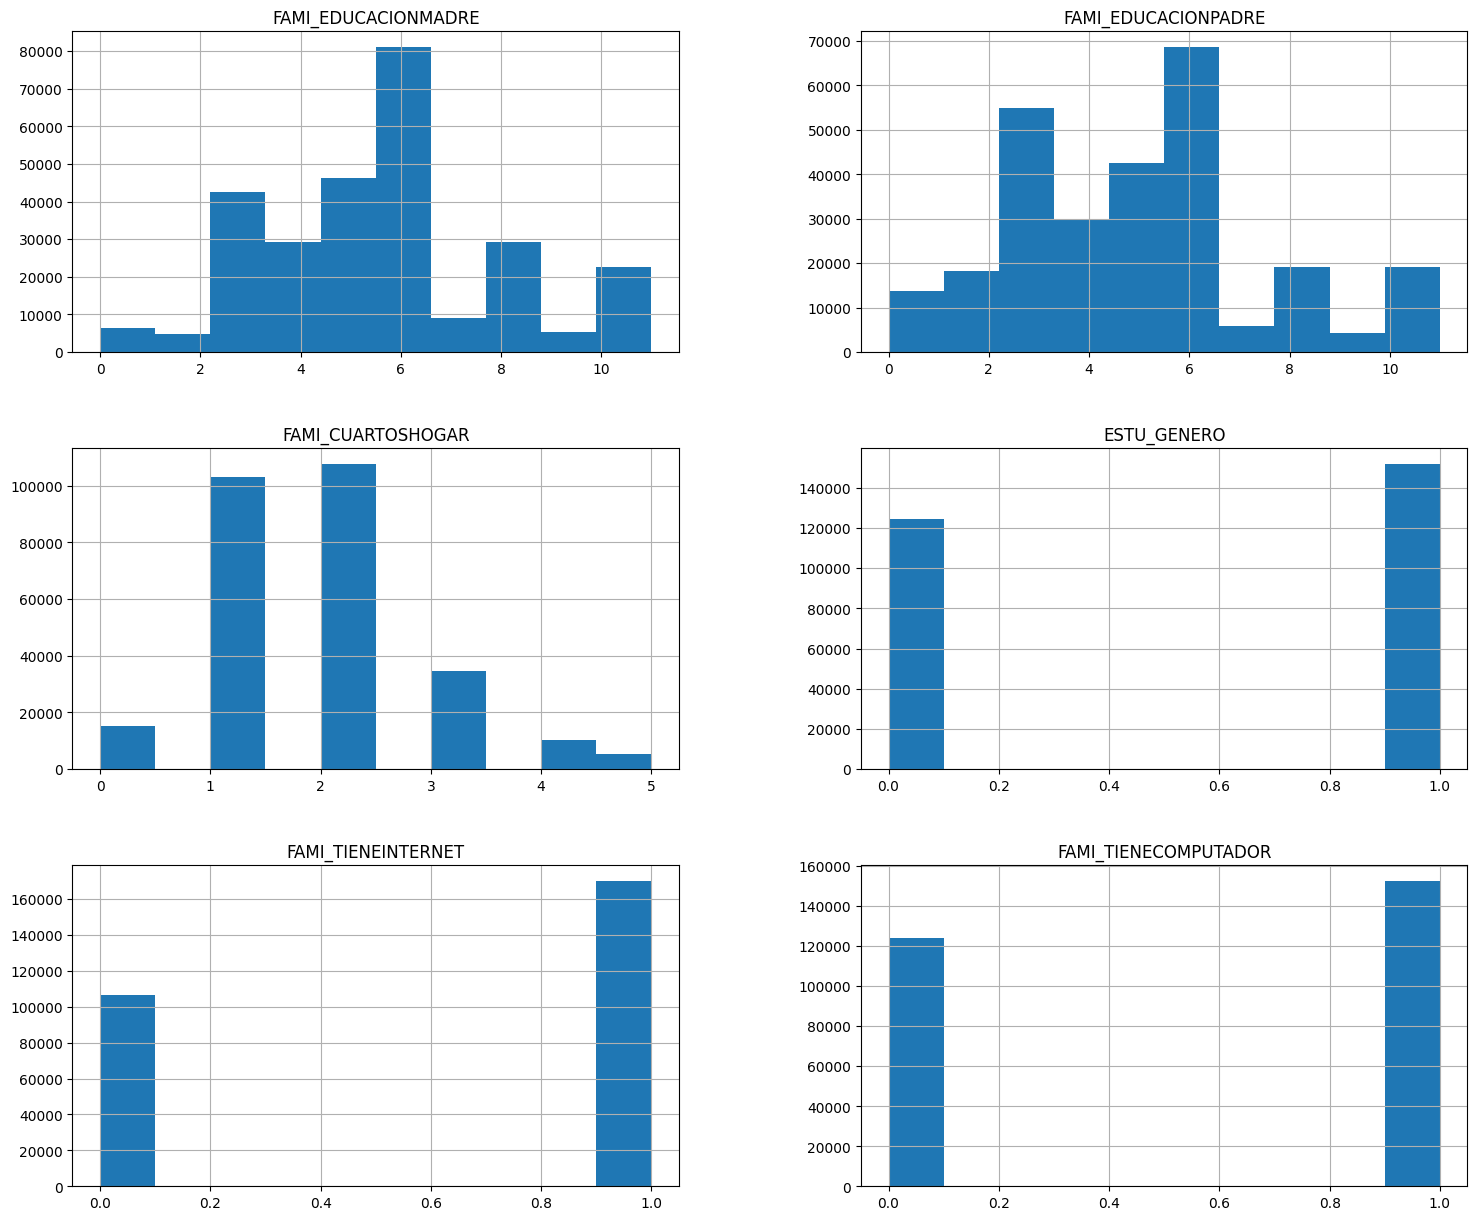

In [62]:
desc = ["FAMI_EDUCACIONMADRE", "FAMI_EDUCACIONPADRE", "FAMI_CUARTOSHOGAR", "ESTU_GENERO", "FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR"]
a = df_encoded[desc].hist(figsize=(18,15))

# Dataset

Se crean los datasets de train y test, teniando como Y todas las columnas de resultados de las diferentes areas y como X los datos del estudiante y su familia

In [63]:
# Creación de datasets
X_train, X_test, y_train, y_test = train_test_split(df_encoded[input_cols], df_encoded[target_cols], test_size=0.2, random_state=42)